In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import dataset

In [ ]:
drink=pd.read_csv('../input/drink/drink.csv')
drink_cluster = drink.iloc[:,1:-2]
drink_cluster = drink_cluster[drink_cluster.columns.difference(['size'])]
drink_cluster

## 2. Use K-Prototypes  
##### 연속형과 범주형 자료를 동시에 활용할 수 있는 클러스터링 방식

In [28]:
kp = KPrototypes(n_clusters=3, init='Huang', n_init=1, verbose=True)
drink['cluster'] = kp.fit_predict(drink_cluster, categorical=[1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 14, ncost: 11000.189957878423
Run: 1, iteration: 2/100, moves: 2, ncost: 10999.517626639852
Run: 1, iteration: 3/100, moves: 0, ncost: 10999.517626639852


Selecting ‘Huang’ as the init, the model will select the first k distinct objects from the data set as initial k-modes and then assign the most frequent categories equally to the initial k-modes. The ‘Cao’ approach selects prototypes for each data object based on the density of the data point and the dissimilarity value.

---------

Input  
A json file containing the following fields:  
dataset (Array) - The dataset to cluster. The categorical data must be encoded into numerical values.  
k (Int) - The number of clusters to form  
categories (Array) - List of column indices in dataset that contain categorical data
init (String) - Method for selecting initial centroids. Options are: 'Huang', 'Cao', 'random'. Default is 'Cao'  
n_init (Integer) - Number of times k-modes will be run with different starting centroids. The final results will be the best output of n_init consecutive runs. Default is 10.
max_init (Integer) - Maximum number of iterations of the k-modes algorithm for a single run.

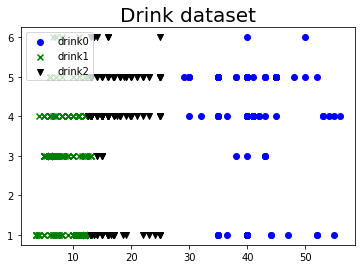

In [9]:
# class별로 데이터를 분할하기.
drink0 = drink[drink['cluster'] ==0]
drink1 = drink[drink['cluster'] ==1]
drink2 = drink[drink['cluster'] ==2]

# class 별로 마킹을 다르게 하기.
drink0_sc = plt.scatter(drink0['alcohol'],drink0['taste'], marker='o', color='b')
drink1_sc = plt.scatter(drink1['alcohol'],drink1['taste'], marker='x', color='g')
drink2_sc = plt.scatter(drink2['alcohol'],drink2['taste'], marker='v', color='k')

# legend 좌측 상단에 삽입
plt.legend((drink0_sc,drink1_sc,drink2_sc), ('drink0','drink1','drink2'),loc='upper left')

# 제목 달기.
plt.title("Drink dataset", fontsize= 20)

plt.show()

### Cluster = 4

In [10]:
kp2 = KPrototypes(n_clusters=4, init='Huang', n_init=1, verbose=True)
drink['cluster_2'] = kp2.fit_predict(drink_cluster, categorical=[1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 52, ncost: 6878.326653532851
Run: 1, iteration: 2/100, moves: 24, ncost: 6788.27271228298
Run: 1, iteration: 3/100, moves: 1, ncost: 6787.863965609784
Run: 1, iteration: 4/100, moves: 0, ncost: 6787.863965609784


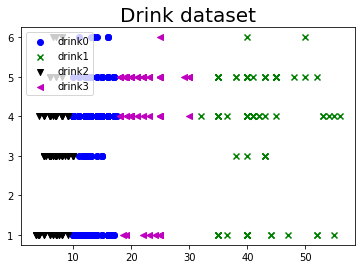

In [30]:
# class별로 데이터를 분할하기.
drink0 = drink[drink['cluster_2'] ==0]
drink1 = drink[drink['cluster_2'] ==1]
drink2 = drink[drink['cluster_2'] ==2]
drink3 = drink[drink['cluster_2'] ==3]

# class 별로 마킹을 다르게 하기.
drink0_sc = plt.scatter(drink0['alcohol'],drink0['taste'], marker='o', color='b')
drink1_sc = plt.scatter(drink1['alcohol'],drink1['taste'], marker='x', color='g')
drink2_sc = plt.scatter(drink2['alcohol'],drink2['taste'], marker='v', color='k')
drink3_sc = plt.scatter(drink3['alcohol'],drink3['taste'], marker='<', color='m')

# legend 좌측 상단에 삽입
plt.legend((drink0_sc,drink1_sc,drink2_sc, drink3_sc), ('drink0','drink1','drink2', 'drink3'),loc='upper left')

# 제목 달기.
plt.title("Drink dataset", fontsize= 20)

plt.show()

## 3. Use NearestNeighbors for the recommendation of the input

In [20]:
#example 1
b = pd.DataFrame({'alcohol':10, 'taste':4}, index = [0])
b

,alcohol,taste
0,10,4


In [23]:
#example 2
b1 = pd.DataFrame({'alcohol':37, 'taste':2}, index = [0])
b1

,alcohol,taste
0,37,2


In [24]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5) #몇개의 이웃을 볼꺼냐. default 5 
#pyscript로 연동
neigh.fit(drink_cluster)

NearestNeighbors()

In [31]:
print(neigh.kneighbors(b,n_neighbors = 5,return_distance=False))
#가장 가까운 item의 index

[[270 355 326 208 335]]


In [32]:
print(neigh.kneighbors(b1,n_neighbors = 5,return_distance=False))
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

[[488 426 420 243 245]]
